## K Nearest Neighbors Machine Learning Algorithm 

### Car data set

data set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Attempt to classify  buying values -> unacc, acc, good and vgood , by assigning a value from 1-4 and then using a KNN ML algorithm



In [43]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#preparing the file to use pandas library to parse


# initalize the attributes of the data file
headerString = "buying,maint,door,persons,lug_boot,safety,class"
fileName = "car.data"

# simple function to add the headers to the data file
def StringPrepender(filename, string):
    with open(filename, 'r+') as f:
        content = f.read()
        f.seek(0, 0)
        f.write(string.rstrip('\r\n') + '\n' + content)
        
# function call with header str        
#StringPrepender(fileName,headerString)

In [3]:
CarData = pd.read_csv("car.data")
#CarData #test out to see if the data set was properly imported

#need to convert the pd write to a list

#now need to convert the data from a str to a numerical value
# using the preprocessing element

element = preprocessing.LabelEncoder() 

#declare an array with the header str to iterate through
headers = ["buying","maint","door","persons","lug_boot","safety","class"] 

for h in headers:
    globals()["var" + str(h)] = element.fit_transform(list(CarData[str(h)])) #initalize hearder vars

#print(buying) #test that we have converted to integers

predict = "class"

#convert to a larger list
dep = list(zip(varbuying, varmaint, vardoor, varpersons, varlug_boot, varsafety)) #x
# take numpy array and convert to list 
indep = list(varclass) #y 

xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(dep, indep, test_size = 0.1)

#for x in zip(xTrain,yTest):
 #   print(xTrain, yTest) #test print
  #  print("\n")


### Nearest neighbor algorithms are non-generalizing ML meant to find a predefined amount of training samples closest (Euclidean Distance) to an inserted point, and predict the attributes of this point. 
 

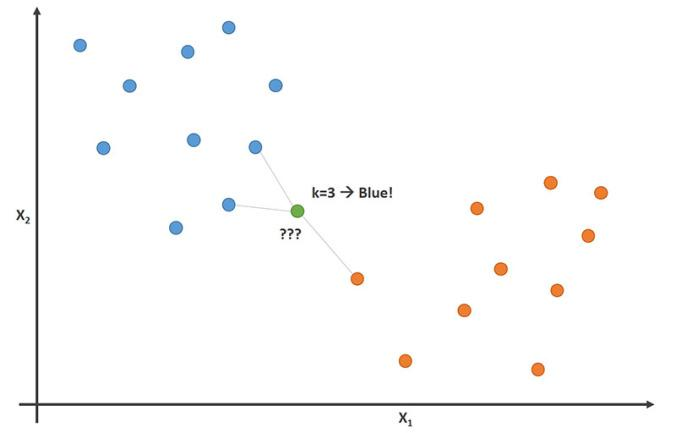

in this image it might look like you could compute the distance from each data point by hand but when scaled to 1000's or 1,000,000's of data points it would be impossible to compute one by one. That is where the ML implementation comes in 

In [156]:
# time to implement

model = KNeighborsClassifier(n_neighbors = 5) #can set the neighbors to any range

model.fit(xTrain, yTrain)


accuracy = model.score(xTest, yTest)
# print accuracy in percent
print("The Current Model Accuracy is "+str(100*accuracy)+str("%\n\n"))

predictedData = model.predict(xTest)


classValues = ["unacc", "acc", "good", "vgood"] #redefining the scores

for i in range (len(predictedData)):
    # printing the raw data
    print("Predicted Data: ", classValues[predictedData[i]], "Test Data: ", xTest[i], "Actual Data: ", classValues[yTest[i]])
    modelN = model.kneighbors([xTest[i]],9, True)
    #print("\n")
    #print(modelN)
    
  


The Current Model Accuracy is 91.32947976878613%


Predicted Data:  good Test Data:  (0, 1, 0, 2, 1, 1) Actual Data:  good
Predicted Data:  good Test Data:  (0, 2, 3, 0, 2, 1) Actual Data:  good
Predicted Data:  good Test Data:  (1, 0, 0, 2, 2, 2) Actual Data:  good
Predicted Data:  good Test Data:  (0, 2, 1, 1, 1, 2) Actual Data:  good
Predicted Data:  good Test Data:  (3, 0, 1, 2, 1, 2) Actual Data:  good
Predicted Data:  good Test Data:  (0, 1, 3, 0, 1, 2) Actual Data:  good
Predicted Data:  good Test Data:  (1, 3, 3, 1, 2, 2) Actual Data:  good
Predicted Data:  good Test Data:  (1, 2, 0, 0, 1, 0) Actual Data:  good
Predicted Data:  good Test Data:  (3, 1, 2, 1, 0, 2) Actual Data:  unacc
Predicted Data:  good Test Data:  (0, 2, 1, 1, 2, 2) Actual Data:  good
Predicted Data:  good Test Data:  (3, 2, 3, 0, 0, 1) Actual Data:  good
Predicted Data:  good Test Data:  (0, 0, 0, 2, 2, 0) Actual Data:  good
Predicted Data:  good Test Data:  (0, 3, 2, 0, 1, 2) Actual Data:  good
Predicted Da

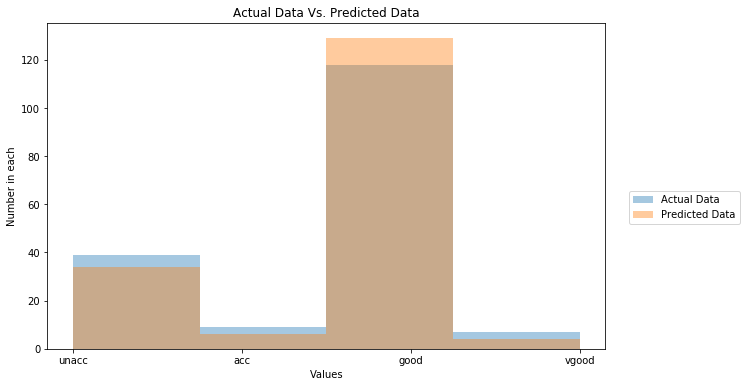

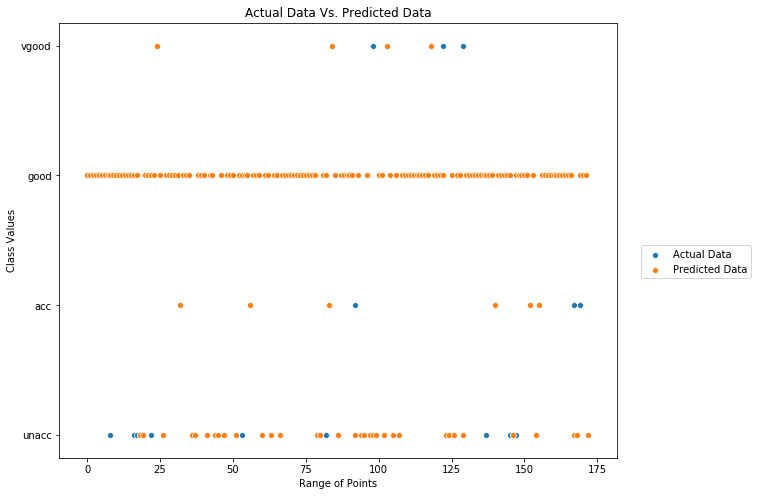

In [158]:
## Plotting the Data at ~90.75144% accuracy

# function to plot the results of the data: rating, actual data, predicted data
def DataPlots(classValues, yTest, predictedData):    
    plt.figure(figsize = (10,6))
    Numbins = len(classValues)
    predHist = sns.distplot(yTest, bins = Numbins, label = "Actual Data", kde = False)
    actHist = sns.distplot(predictedData, bins = Numbins, label = "Predicted Data", kde = False)
    plt.title('Actual Data Vs. Predicted Data')
    plt.ylabel("Number in each")
    plt.xlabel("Values")
    predHist.set_xticklabels(classValues)
    predHist.set_xticks(range(0,4))
    plt.legend(bbox_to_anchor = (1.25, 0.5))
    plt.show()

    plt.figure(figsize = (10,8))
    actPlot = sns.scatterplot(data = np.array(yTest), label = "Actual Data")
    predictPlot = sns.scatterplot(data = np.array(predictedData),label = "Predicted Data")
    plt.title('Actual Data Vs. Predicted Data')
    plt.xlabel("Range of Points")
    plt.ylabel("Class Values")
    predictPlot.set_yticklabels(classValues)
    predictPlot.set_yticks(range(0,4))
    plt.legend(bbox_to_anchor = (1.25, 0.5))
    plt.show()




DataPlots(classValues, yTest, predictedData)


Enter the range of neighbors to Optimize
10

The optimal number of Neighbors in the range of 1 to 10 is 7 with an accuracy of 94.79768786127167%



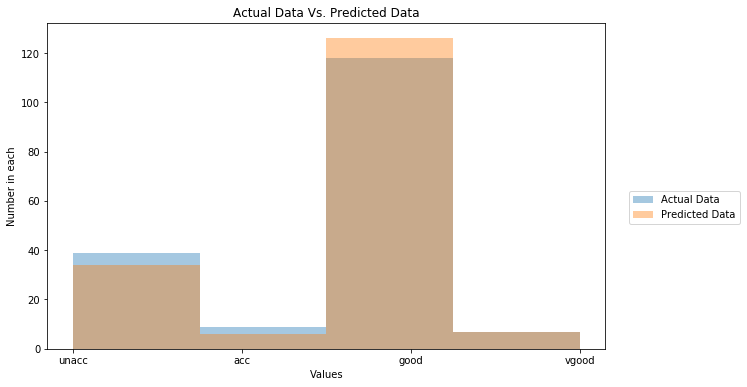

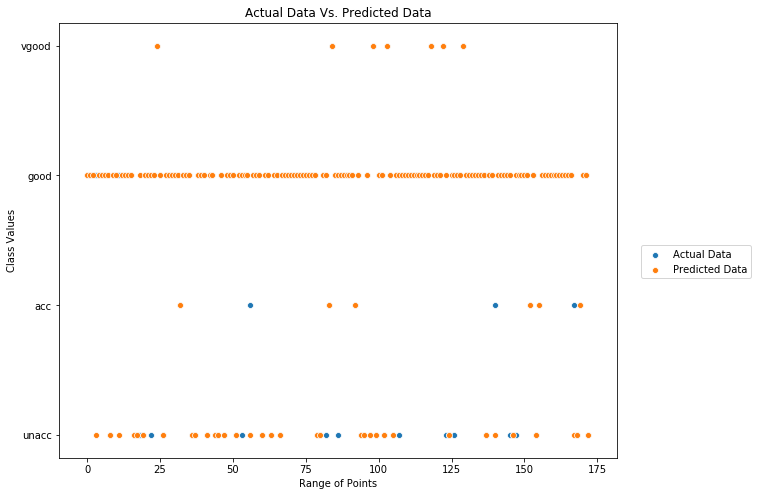

In [159]:
## now optimize the number of neihbours from 1-1000

def OptimizeNN(maxRange):
    
    accuracy = []

    for i in range(maxRange):
        bestAccuracy = 0
        model = KNeighborsClassifier(n_neighbors = i+1) #can set the neighbors to any range
        model.fit(xTrain, yTrain)
        accuracy.append(model.score(xTest,yTest))
        
        predictedData = model.predict(xTest)
    #print(accuracy)
    return max(accuracy), np.argmax(accuracy), predictedData, yTest

print("Enter the range of neighbors to Optimize")
rangeInput = int(input())
print()

print("The optimal number of Neighbors in the range of 1 to "+ str(rangeInput)+" is "+str(OptimizeNN(rangeInput)[1]+1)+" with an accuracy of "+ str(100*OptimizeNN(rangeInput)[0])+"%")
print()

DataPlots(classValues, OptimizeNN(rangeInput)[3], OptimizeNN(rangeInput)[2])
